In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#load d dataset
df = pd.read_csv("Data/processeddata.csv")

In [4]:
X = df.drop(columns=['Biopsy'])
y = df['Biopsy']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
models_folder = os.path.join(os.getcwd(), '..', 'Models')

In [7]:
#load log_regression
logistic_regression_path = os.path.join(models_folder, 'logistic_regression_model.pkl')
with open(logistic_regression_path, 'rb') as f:
    logistic_regression = pickle.load(f)

In [16]:
#Load XG_BOOST model
xgboost_path = os.path.join(models_folder, 'xgboost_model.pkl')
with open(xgboost_path, 'rb') as f:
    xgboost_model = pickle.load(f)


In [17]:
#Scalling the model
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [12]:
y_pred_logistic = logistic_regression.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, logistic_regression.predict_proba(X_test_scaled)[:, 1])
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

In [13]:
print("Evaluation Metrics for Logistic Regression Model:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-score:", f1_logistic)
print("ROC-AUC:", roc_auc_logistic)
print("Confusion Matrix:")
print(conf_matrix_logistic)
print("\n")


Evaluation Metrics for Logistic Regression Model:
Accuracy: 0.9593023255813954
Precision: 0.6428571428571429
Recall: 0.8181818181818182
F1-score: 0.7200000000000001
ROC-AUC: 0.9728966685488425
Confusion Matrix:
[[156   5]
 [  2   9]]




In [18]:
# Evaluate XGBoost model
y_pred_xgboost = xgboost_model.predict(X_test_scaled)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)
f1_xgboost = f1_score(y_test, y_pred_xgboost)
roc_auc_xgboost = roc_auc_score(y_test, xgboost_model.predict_proba(X_test_scaled)[:, 1])
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)


In [20]:
print("Evaluation Metrics for XGBoost Model:")
print("Accuracy:", accuracy_xgboost)
print("Precision:", precision_xgboost)
print("Recall:", recall_xgboost)
print("F1-score:", f1_xgboost)
print("ROC-AUC:", roc_auc_xgboost)
print("Confusion Matrix:")
print(conf_matrix_xgboost)
print("\n")


Evaluation Metrics for XGBoost Model:
Accuracy: 0.9476744186046512
Precision: 0.75
Recall: 0.2727272727272727
F1-score: 0.39999999999999997
ROC-AUC: 0.898927159796725
Confusion Matrix:
[[160   1]
 [  8   3]]




Text(95.72222222222221, 0.5, 'True labels')

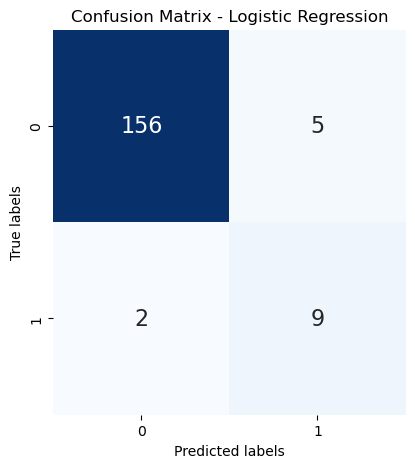

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_logistic, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

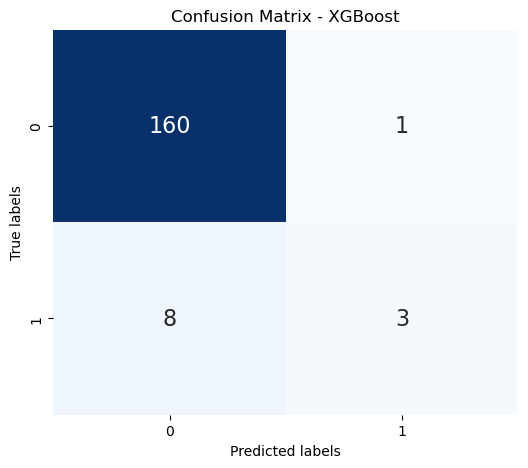

In [26]:
# Visualize Confusion Matrix for XGBoost model
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgboost, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()